In [1]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Выбираем картинку и считываем ее
path = 'C:/Users/n3sm3/Desktop/image.jpg'
img = mpimg.imread(path)
# img - массив со значениями пикселей

In [3]:
# Преобразование в двухмерный массив
img_arr = np.array(img, dtype=np.float64) / 255
w, h, d = original_shape = tuple(img_arr.shape)
image_array = np.reshape(img_arr, (w * h, d))
image_array

array([[0.21176471, 0.16862745, 0.14509804],
       [0.2       , 0.16470588, 0.1372549 ],
       [0.20392157, 0.16862745, 0.13333333],
       ...,
       [0.76862745, 0.65490196, 0.5372549 ],
       [0.76470588, 0.65098039, 0.53333333],
       [0.74509804, 0.65490196, 0.52941176]])

In [4]:
# Устанавливаем число цветов 
n_colors = 16
# Проводим кластеризацию
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(image_array)
labels = kmeans.predict(image_array)
labels

array([ 7,  7,  7, ..., 12, 12,  5])

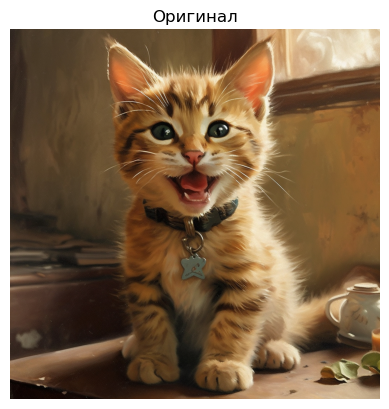

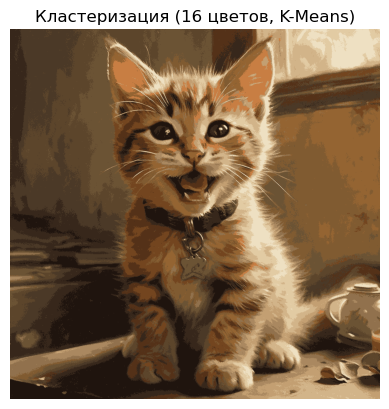

In [5]:
# Функция для перекраски
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Оригинал картинки
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Оригинал")
plt.imshow(img)
# Результат
plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Кластеризация ({n_colors} цветов, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))